Graphiques comparant les types de tirs de toutes les équipes dans une saison



In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../../..') # Remonte au niveau du projet principal
from ift6758.data.pandas_conversion import get_dataframe_from_data
from ift6758.visualizations.graphiques.graphiques_util import  afficher_graphique_typestir, afficher_graphique_distance_but,afficher_graphique_pourcentage_dist_types,afficher_graphique_pourcentage_dist_type
import warnings
warnings.filterwarnings("ignore")

In [26]:
# graphique comparant les types de tirs de toutes les équipes pour la saison 2018-2019
saison='20182019'
df= get_dataframe_from_data(saison)

# afficher les counts pour exploratiom
#print('Tous les tirs',df.groupby('shotType').size())
#print('buts',df[df['typeDescKey'] == 'goal'].groupby('shotType').size())

df.tail()

,Unnamed: 0,teamId,period,timeInPeriod,shotType,xCoord,yCoord,shooterId,shooterName,goalieId,goalieName,typeDescKey
85934,78,19.0,1,16:47,tip-in,-71.0,-3.0,8475158.0,Ryan O'Reilly,8471695.0,Tuukka Rask,goal
85935,97,19.0,1,19:52,backhand,-74.0,1.0,8474565.0,Alex Pietrangelo,8471695.0,Tuukka Rask,goal
85936,250,19.0,3,11:25,snap,-67.0,3.0,8475170.0,Brayden Schenn,8471695.0,Tuukka Rask,goal
85937,270,19.0,3,15:22,snap,-77.0,7.0,8477482.0,Zachary Sanford,8471695.0,Tuukka Rask,goal
85938,282,6.0,3,17:50,wrist,44.0,24.0,8476891.0,Matt Grzelcyk,8476412.0,Jordan Binnington,goal


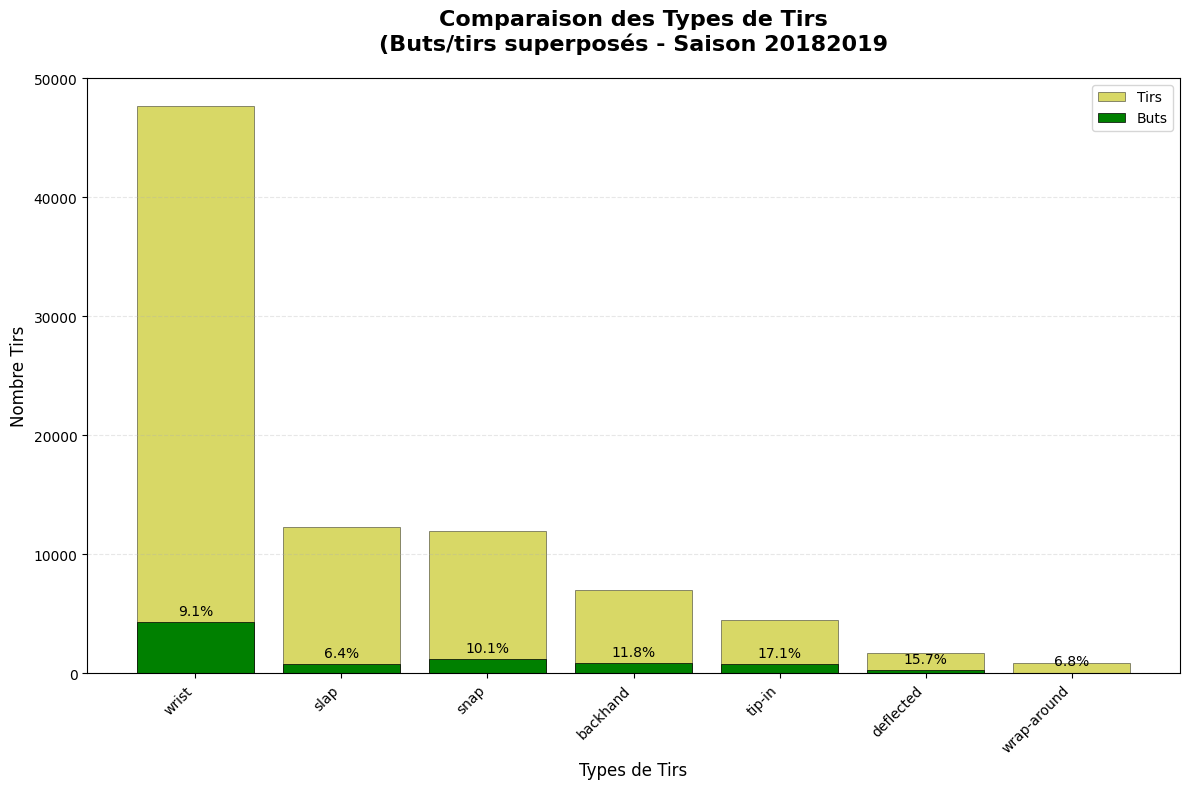

In [27]:
# fonction qui affiche un graphique comparant les types de tirs de toutes les équipes dans une saison 
saison='20182019'
afficher_graphique_typestir(df, saison)

<div style="border: 1px solid black; padding: 10px;">

##### Explication du graphique
Pourquoi ce type de graphique ?<br>
Le graphique des barres empilées (tirs en jaune + buts en vert) montrent simultanément le volume par type et la part des buts (les buts sont un sous-ensemble des tirs totaux). Ça permet d’identifier :<br>
*le type le plus fréquent (hauteur totale).<br>
*le type le plus dangereux (proportion de vert par rapport au jaune).<br>

le type de tir  "tip-in" semble le plus dangereux avec 23.6% de conversion. Le type de tir "wrist" est le type le plus courant avec un total de 643 

 </div>

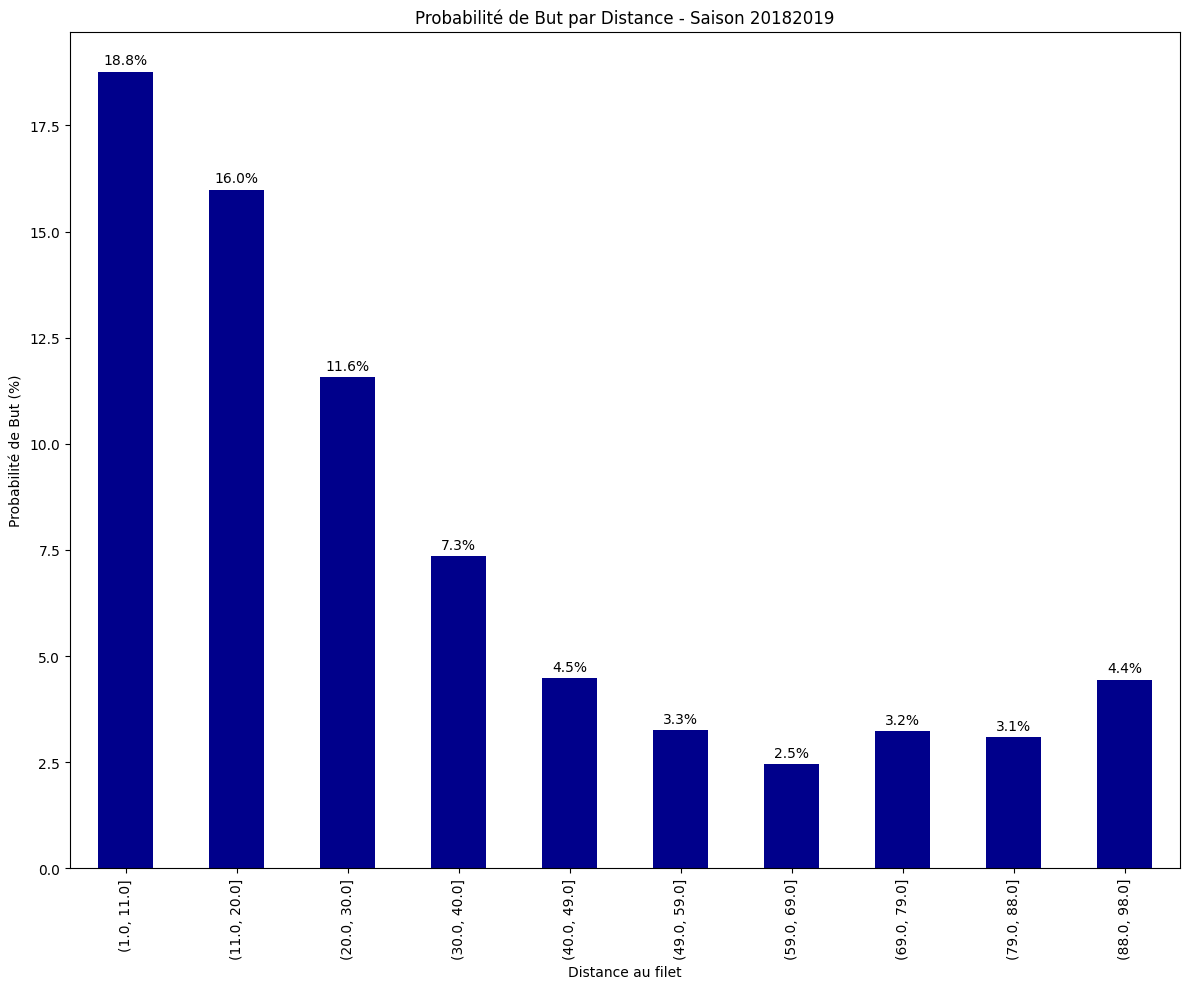

Téléchargement des playoffs : 100%|██████████| 105/105 [00:28<00:00,  3.70it/s]


Sauvegarde des données de la saison 20192020 en cours, veuillez ne pas interrompre le programme


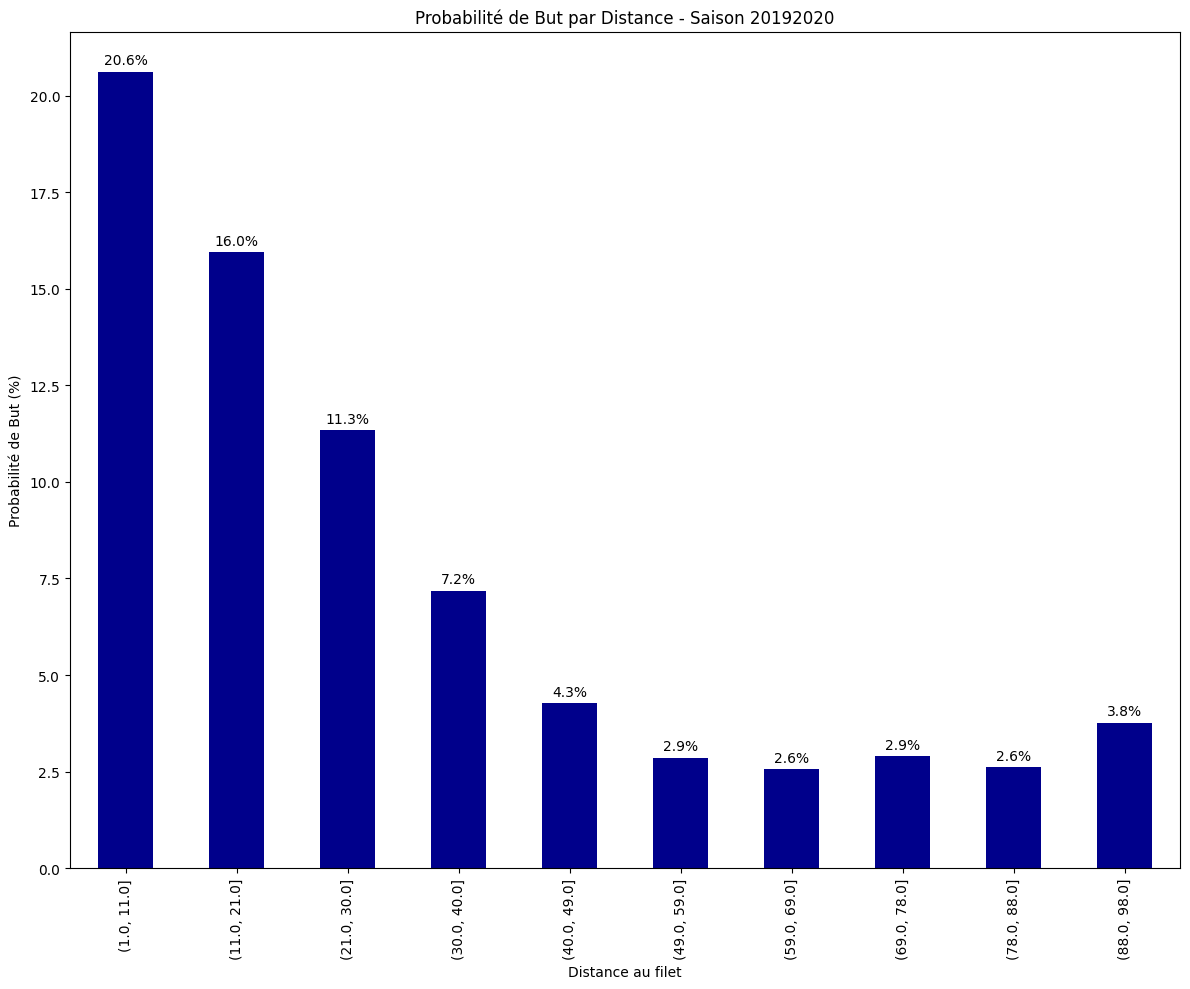

Téléchargement des playoffs : 100%|██████████| 105/105 [00:29<00:00,  3.59it/s]


Sauvegarde des données de la saison 20202021 en cours, veuillez ne pas interrompre le programme


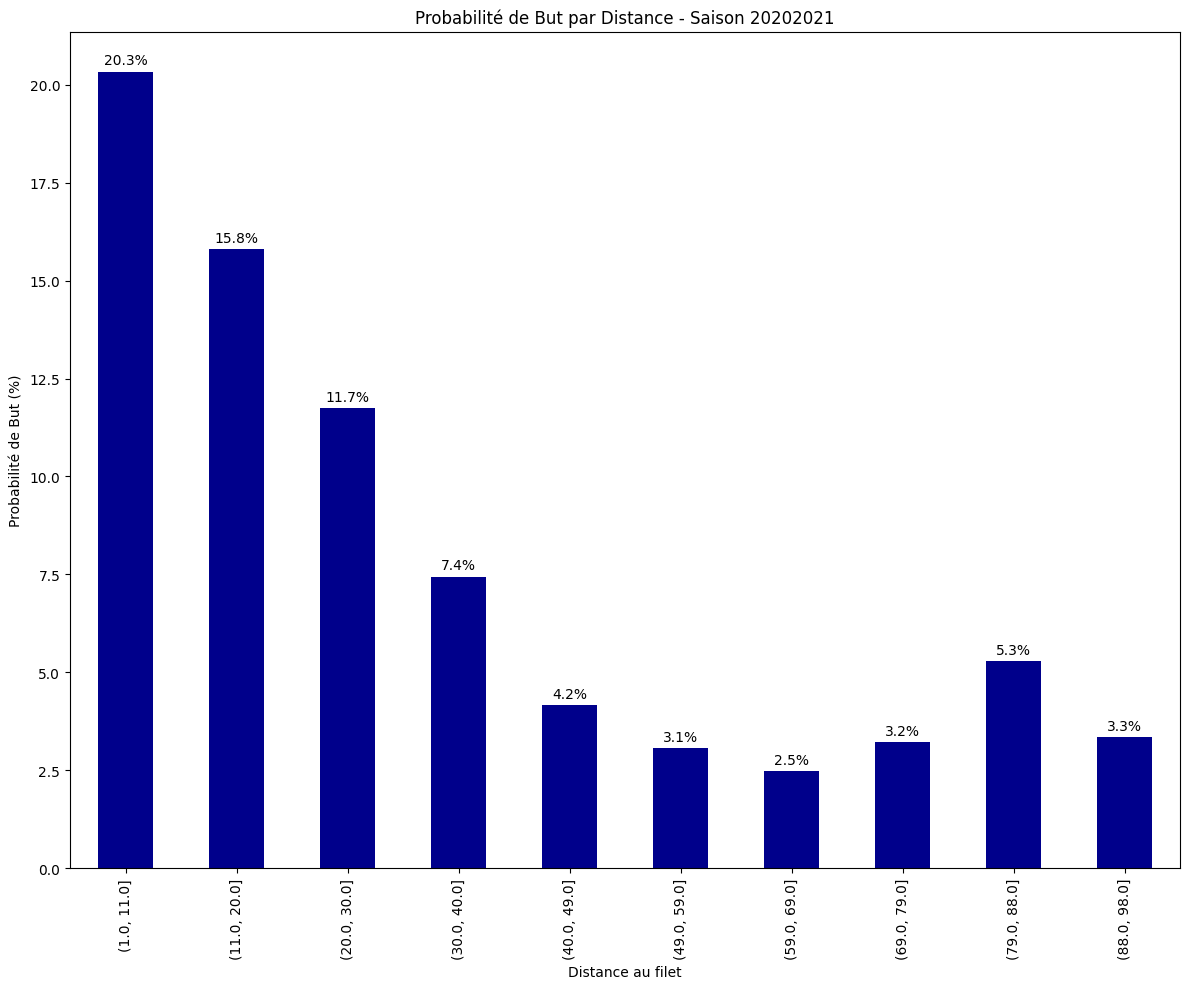

In [29]:

# on iterer sur les saisons 2018-19 a 2020-21
# et on affiche pour chaque saison un graphique a l'aide de la methode afficher_graphique_distance_but
#  Cette méthode analyse la relation entre la distance de tir et la probabilité de marquer un but,
#  en produisant une visualisation qui permet d'identifier les zones de tir les plus efficaces sur la patinoire.
saisons=['20182019','20192020','20202021']

for saison in saisons:
    df= get_dataframe_from_data(saison)
    afficher_graphique_distance_but(df,saison)


<div style="border: 1px solid black; padding: 10px;">

##### Relation entre la distance de tir et la probabilité de marquer un but

Approche:<br>
   *Calcule la distance de chaque tir au filet (distance euclicienne)<br>
   *Diviser les distances en des intervalles égaux (bins) pour calculer les probabilités comparables<br>
   *Calcule la probabilité de but pour chaque intervalle : (buts / tirs totaux) × 100 <br>
   *Afficher un graphique en barres montrant la probabilité par intervalle de distance<br>

Interpretation des 3 graphiques :<br> 
pour les données des 3 saisons  la relation distance → probabilité de but est clairement décroissance. Ce qui normale plus on s'approche la probabilité qu'un tir soit un but augmente. Les probabilités sont plus elevé pour les trois premiers intervalles :

Pour le premier intervalle 3–12 ft : ~16–20% (zone de rebonds devant le filet).

Deuxieme Intervalle 12–21 ft : ~16–18%.

Troisieme Intervalle 21–39 ft : ~9–13% → 7–10%.

la probabilité décroit ensuite lorsqu'on eu >60 ft : ~0–3% … sauf un pic pour l'intervalle 72–84 ft (~7–11%) 

On remarques que rendu a 80 ft, on voit que les probabilités (a valider lorsqu'on aura toutes les données)

Comparaison inter-saisons : la forme est stable (mêmes ordres de grandeur).
Les petites différences semblent compatibles avec l’aléa; pas de changement structurel évident entre 2018-19 et 2020-21.
pour les 3 saisons 
 </div>

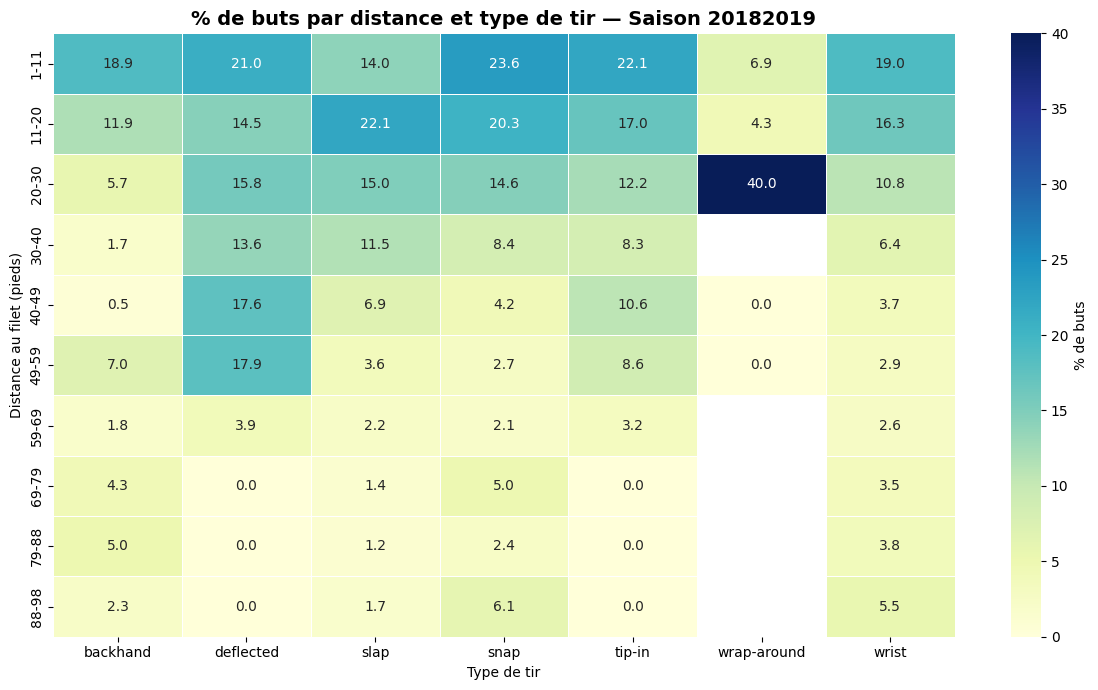

In [30]:
# graphique heatmap qui combine % buts en fonction de distance et type tir
saison ='20182019'
df=get_dataframe_from_data(saison)
afficher_graphique_pourcentage_dist_types(df,saison)

<div style="border: 1px solid black; padding: 10px;">

##### Graphique combiné

Pourquoi ce type de graphique ? <br>
Il combine proprement les deux dimensions demandées (distance × type) et permet la comparaison à distance égale.
Le code couleur rend immédiate la hiérarchie de dangerosité.

Tendance distance :  <br>
la probabilité de but baisse en s’éloignant du filet.

Types les plus dangereux (près du filet, 2–19 ft)

les valeurs de tip-in très élevé à courte portée (≈25–35%).

les valeurs de snap élevé à 11–28 ft (≈20–22%), puis chute avec la distance.

les valeurs de wrist modéré (≈12–17% à courte portée), chute ensuite.

les valeurs de backhand plutôt modeste (≈7–11% près du filet).

les valeurs de slap faible sauf très près; le “80%” à 11–19 ft est vraisemblablement un probleme de données (je vais revalider).

les valeurs de wrap-around très rare; % non interprétable sans effectif.

Conclusion : la proximité au filet domine; les tip-ins et snap shots convertissent le mieux à courte distance. À ≥40–50 ft, tous les types tombent bas (≈0–5%).


<br>


 </div>

##### ces graphique sont plus pour la comprehension seulement

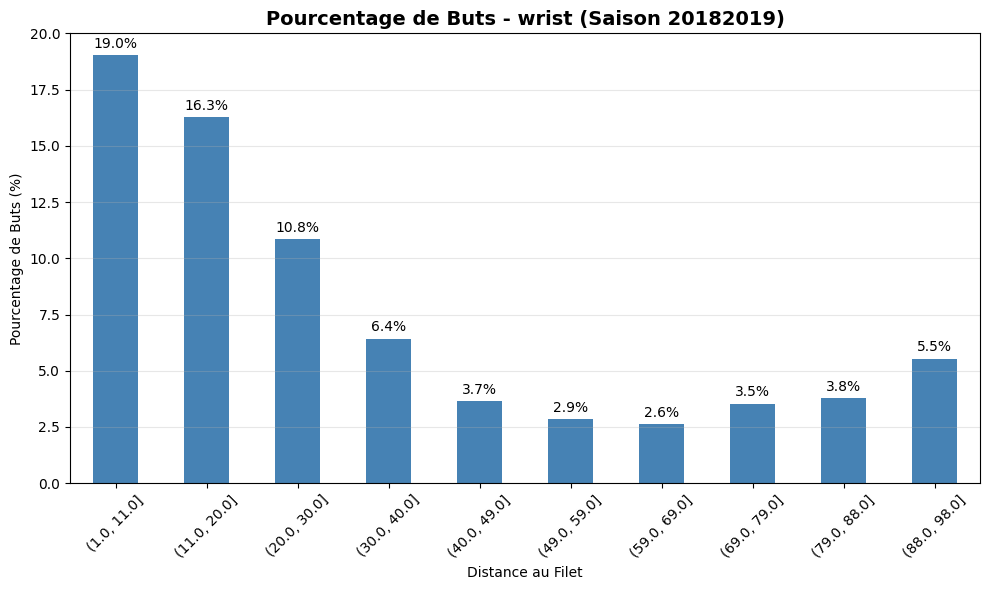

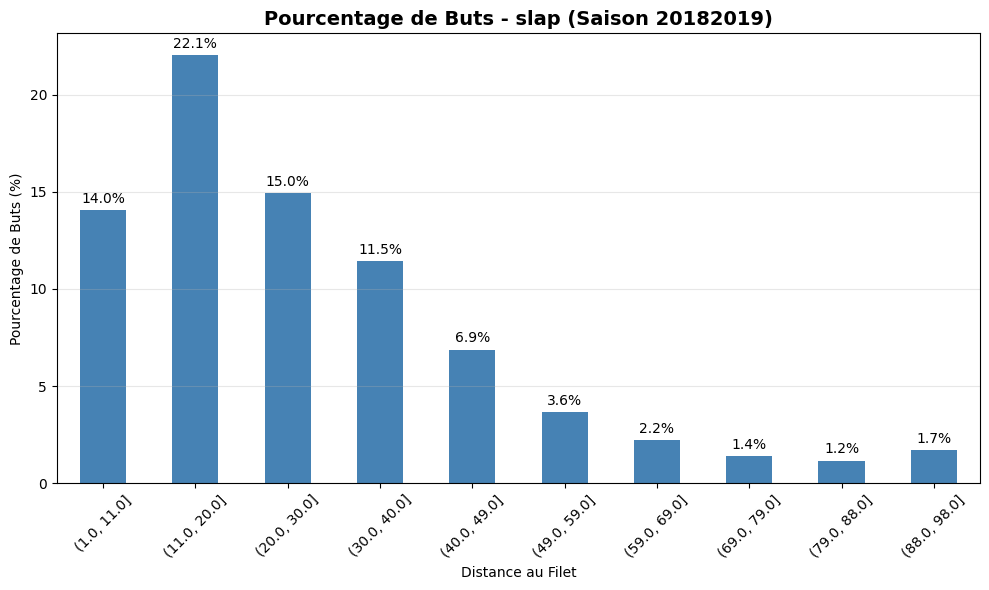

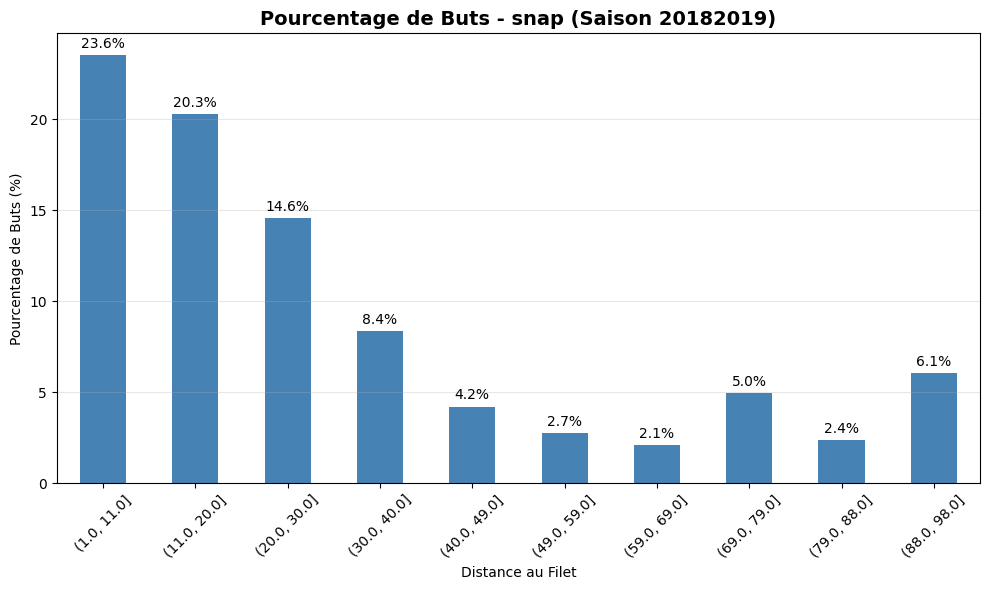

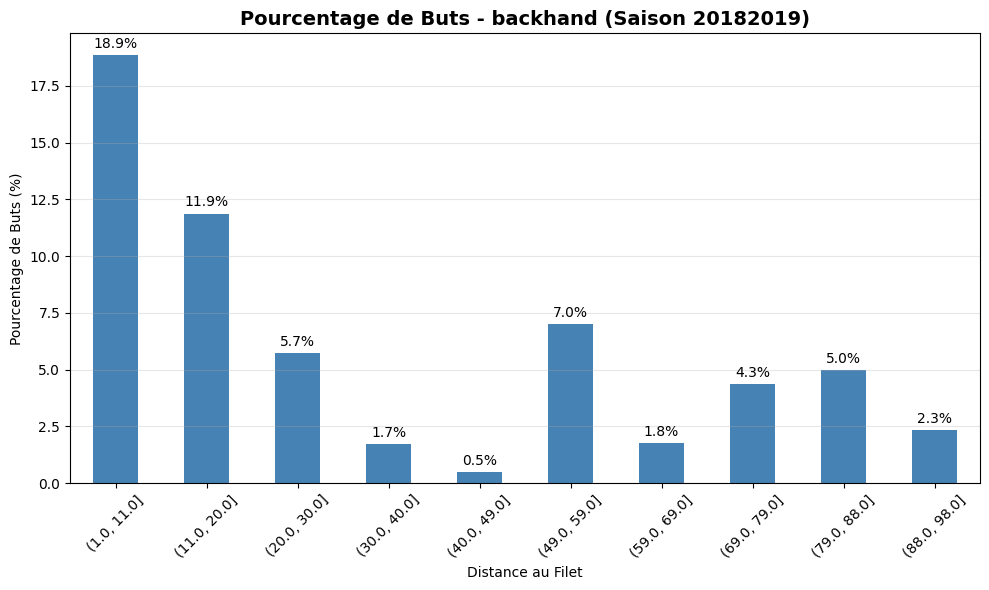

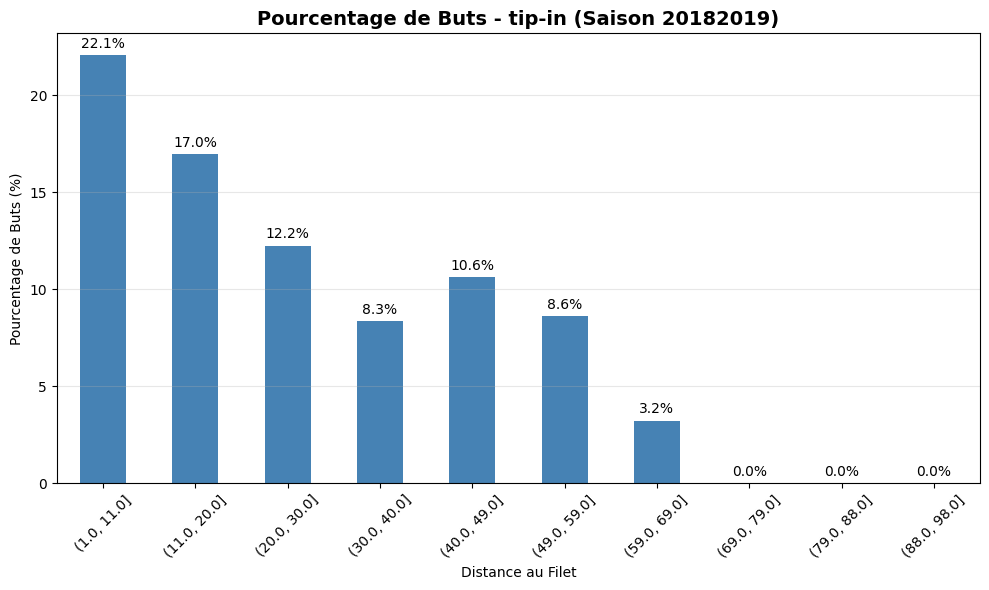

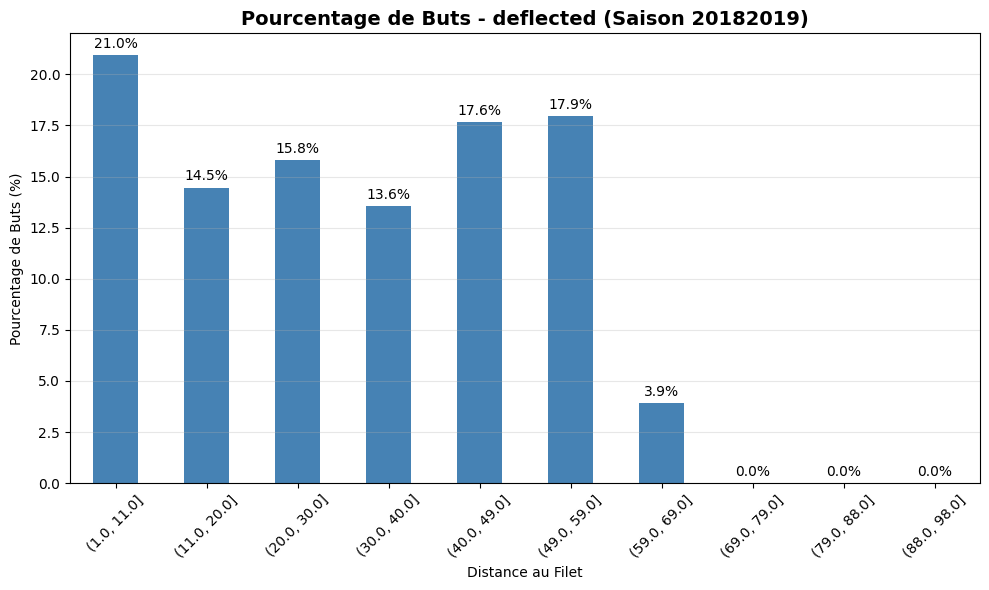

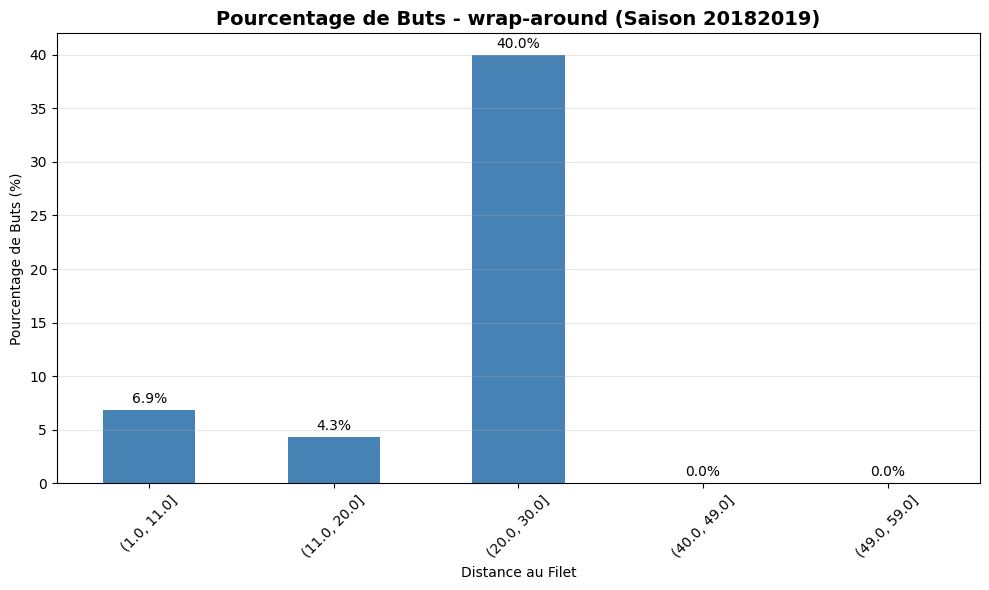

In [31]:
# graphique  probalité en fonction de distance pour chaque type tir (plus pour la comprehension seulement )
saison ='20182019'
df=get_dataframe_from_data(saison)
afficher_graphique_pourcentage_dist_type(df,saison)